In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Load the data
data = pd.read_csv('forecast_history.csv')
data.head(10)


,Unnamed: 0,Median house price,Westpac: 4 year forecast,Joe Bloggs: 2 year forecast,Harry Spent: 5 year forecast
0,2011,340000,56%,23%,-20%
1,2012,370000,53%,34$,-80%
2,2013,350000,NaN,19%,-70%
3,2014,420000,13%,42%,-80%
4,2015,425000,33%,23%,-50%
5,2016,500000,-5%,15%,-90%
6,2017,520000,45%,1500%,-30%
7,2018,550000,34%,18%,NaN
8,2019,596000,34%,19%,-110%
9,2020,610000,20%,23%,-90%


In [2]:
data.columns = ['Year', 'Median_House_Price', 'Westpac_4_Year_Forecast', 'Joe_Bloggs_2_Year_Forecast', 'Harry_Spent_5_Year_Forecast']

# Remove percentage symbols from forecast columns and convert to numeric values
data['Westpac_4_Year_Forecast'] = pd.to_numeric(data['Westpac_4_Year_Forecast'].str.replace('%', '').str.replace('I5', '15'), errors='coerce')
data['Joe_Bloggs_2_Year_Forecast'] = pd.to_numeric(data['Joe_Bloggs_2_Year_Forecast'].str.replace('%', '').str.replace('$', ''), errors='coerce')
data['Harry_Spent_5_Year_Forecast'] = pd.to_numeric(data['Harry_Spent_5_Year_Forecast'].str.replace('%', ''), errors='coerce')

# Identify and handle missing values
# For the purpose of this analysis, let's fill missing values with the median of each column
data['Westpac_4_Year_Forecast'].fillna(data['Westpac_4_Year_Forecast'].median(), inplace=True)
data['Joe_Bloggs_2_Year_Forecast'].fillna(data['Joe_Bloggs_2_Year_Forecast'].median(), inplace=True)
data['Harry_Spent_5_Year_Forecast'].fillna(data['Harry_Spent_5_Year_Forecast'].median(), inplace=True)

# Remove or correct outliers (e.g., Joe Bloggs 1500% in 2017 could be a data entry error)
# Let's assume anything above 100% is an outlier and cap it at 100%
data['Joe_Bloggs_2_Year_Forecast'] = np.where(data['Joe_Bloggs_2_Year_Forecast'] > 100, 100, data['Joe_Bloggs_2_Year_Forecast'])

# Convert Median House Price to numeric (remove any potential issues, if any, in the data)
data['Median_House_Price'] = pd.to_numeric(data['Median_House_Price'], errors='coerce')

# Preview the cleaned data
print(data.head())


   Year  Median_House_Price  Westpac_4_Year_Forecast  \
0  2011            340000.0                     56.0   
1  2012            370000.0                     53.0   
2  2013            350000.0                     20.0   
3  2014            420000.0                     13.0   
4  2015            425000.0                     33.0   

   Joe_Bloggs_2_Year_Forecast  Harry_Spent_5_Year_Forecast  
0                          23                        -20.0  
1                          34                        -80.0  
2                          19                        -70.0  
3                          42                        -80.0  
4                          23                        -50.0  


C:\Users\Laptop'\AppData\Local\Temp\ipykernel_14204\3422737441.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Westpac_4_Year_Forecast'].fillna(data['Westpac_4_Year_Forecast'].median(), inplace=True)
C:\Users\Laptop'\AppData\Local\Temp\ipykernel_14204\3422737441.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

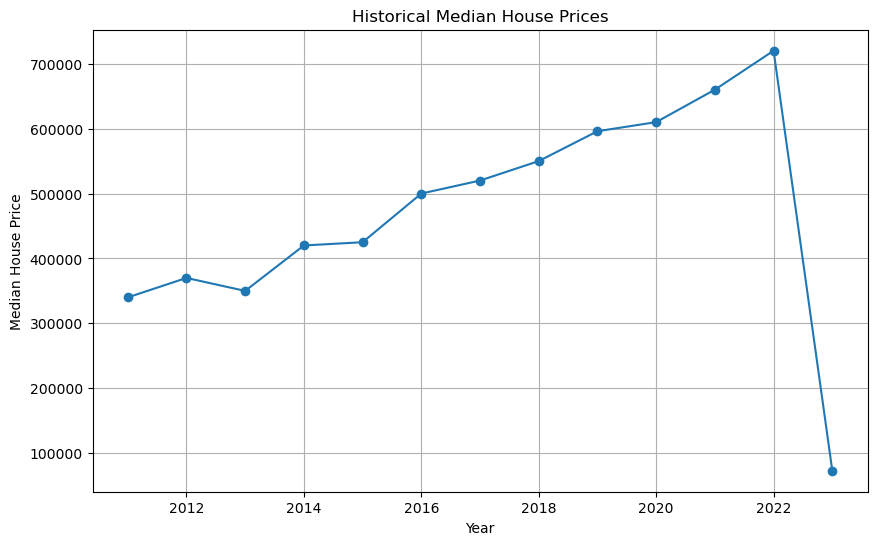

In [3]:
# Ensure 'Year' column is set as index and sort it
data = data.set_index('Year').sort_index()

# Plot the historical median house prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Median_House_Price'], marker='o')
plt.title('Historical Median House Prices')
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:     Median_House_Price   No. Observations:                   14
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -163.101
Date:                Wed, 04 Sep 2024   AIC                            332.202
Time:                        14:10:36   BIC                            333.897
Sample:                             0   HQIC                           331.854
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1613      7.874      0.020      0.984     -15.271      15.594
ma.L1         -0.3577      6.746     -0.053      0.958     -13.580      12.865
sigma2      4.725e+10   2.96e-09    1.6e+19      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


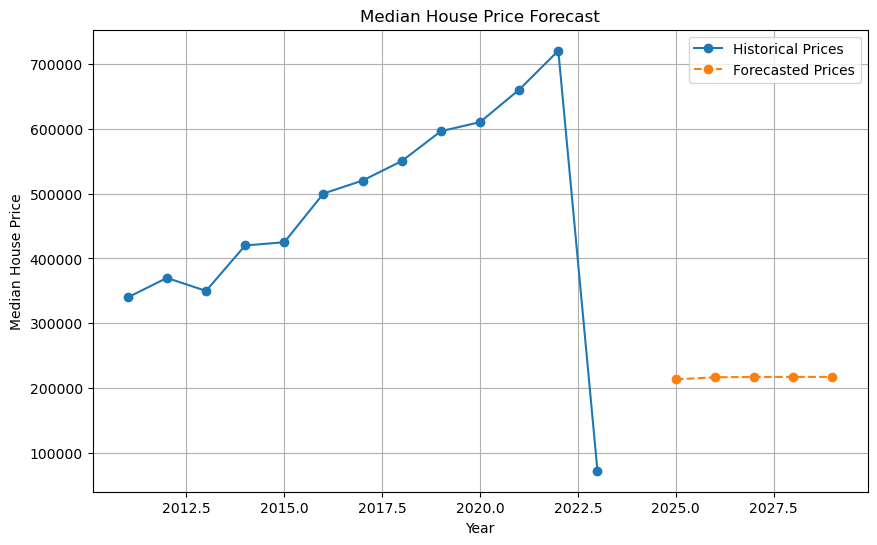

      Median_House_Price
2025                 NaN
2026                 NaN
2027                 NaN
2028                 NaN
2029                 NaN


In [4]:
# Step 1: Time Series Forecasting using ARIMA
# ARIMA requires a univariate series of the target variable (in this case, Median_House_Price)

# Fit the ARIMA model
model = ARIMA(data['Median_House_Price'], order=(1, 1, 1))  # (p, d, q) parameters: you can tune these
model_fit = model.fit()

# Print the summary of the model (optional)
print(model_fit.summary())

# Step 2: Forecast future prices (e.g., for the next 5 years)
forecast_years = 5
start_year = data.index[-1] + 1  # Start the forecast from the year after the last available data
end_year = start_year + forecast_years - 1

# Generate the forecast
forecast = model_fit.forecast(steps=forecast_years)
forecast_index = np.arange(start_year, end_year + 1)

# Step 3: Plot the forecasted future prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Median_House_Price'], label='Historical Prices', marker='o')
plt.plot(forecast_index, forecast, label='Forecasted Prices', marker='o', linestyle='--')
plt.title('Median House Price Forecast')
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Add the forecasted prices to the original data (optional)
forecast_df = pd.DataFrame({'Median_House_Price': forecast}, index=forecast_index)
combined_data = pd.concat([data, forecast_df])

# Step 5: Save the forecasted results to a CSV file
combined_data.to_csv('house_price_forecast.csv')

# Output the forecast
print(forecast_df)